# Atividade 01 - Criando objetos MNE

Dennis Felipe Urtubia e Pedro Perozin

# Carregamento dos dados, labels e descritor

In [23]:
import numpy as np
import json
import mne
import matplotlib

data = np.load('files/data.npy')
labels = np.load('files/labels.npy')

desc_file = open('files/descriptor.json')
descriptor = json.loads(desc_file.read())
desc_file.close()

print('Estruturas => dados', data.shape, 'labels', labels.shape)
print(labels)

Estruturas => dados (125, 257, 1205) labels (125,)
[4 2 3 5 1 2 5 4 2 3 1 5 4 3 2 4 1 2 5 3 4 1 3 1 3 4 2 3 5 1 2 5 4 2 3 1 5
 4 3 2 4 1 2 5 3 4 1 3 1 3 4 2 3 5 1 2 5 4 2 3 1 5 4 3 2 4 1 2 5 3 4 1 3 1
 3 4 2 3 5 1 2 5 4 2 3 1 5 4 3 2 4 1 2 5 3 4 1 3 1 3 4 2 3 5 1 2 5 4 2 3 1
 5 4 3 2 4 1 2 5 3 4 1 3 1 3]


# Criação do EpochsArray

In [15]:
data = data[:,:256,:]
print(data.shape)

trial_duration = 5
sampling_frequency = data.shape[-1] / trial_duration
montage = mne.channels.make_standard_montage('EGI_256')
ch_names = data.shape[1]
ch_types = 'eeg'

# primeiramente devemos criar o objeto info
info = mne.create_info(montage.ch_names, sampling_frequency, ch_types)

#set experiments montage
info.set_montage(montage)

# por fim a criação do EpochsArray
events = np.array([[index, 0, event] for index, event in enumerate(labels)])
epoch_array = mne.EpochsArray(data, info, events)

(125, 256, 1205)
[[  0   0   4]
 [  1   0   2]
 [  2   0   3]
 [  3   0   5]
 [  4   0   1]
 [  5   0   2]
 [  6   0   5]
 [  7   0   4]
 [  8   0   2]
 [  9   0   3]
 [ 10   0   1]
 [ 11   0   5]
 [ 12   0   4]
 [ 13   0   3]
 [ 14   0   2]
 [ 15   0   4]
 [ 16   0   1]
 [ 17   0   2]
 [ 18   0   5]
 [ 19   0   3]
 [ 20   0   4]
 [ 21   0   1]
 [ 22   0   3]
 [ 23   0   1]
 [ 24   0   3]
 [ 25   0   4]
 [ 26   0   2]
 [ 27   0   3]
 [ 28   0   5]
 [ 29   0   1]
 [ 30   0   2]
 [ 31   0   5]
 [ 32   0   4]
 [ 33   0   2]
 [ 34   0   3]
 [ 35   0   1]
 [ 36   0   5]
 [ 37   0   4]
 [ 38   0   3]
 [ 39   0   2]
 [ 40   0   4]
 [ 41   0   1]
 [ 42   0   2]
 [ 43   0   5]
 [ 44   0   3]
 [ 45   0   4]
 [ 46   0   1]
 [ 47   0   3]
 [ 48   0   1]
 [ 49   0   3]
 [ 50   0   4]
 [ 51   0   2]
 [ 52   0   3]
 [ 53   0   5]
 [ 54   0   1]
 [ 55   0   2]
 [ 56   0   5]
 [ 57   0   4]
 [ 58   0   2]
 [ 59   0   3]
 [ 60   0   1]
 [ 61   0   5]
 [ 62   0   4]
 [ 63   0   3]
 [ 64   0   2]
 [ 65   

# Plot de gráficos

EGI 256
Creating RawArray with float64 data, n_channels=256, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


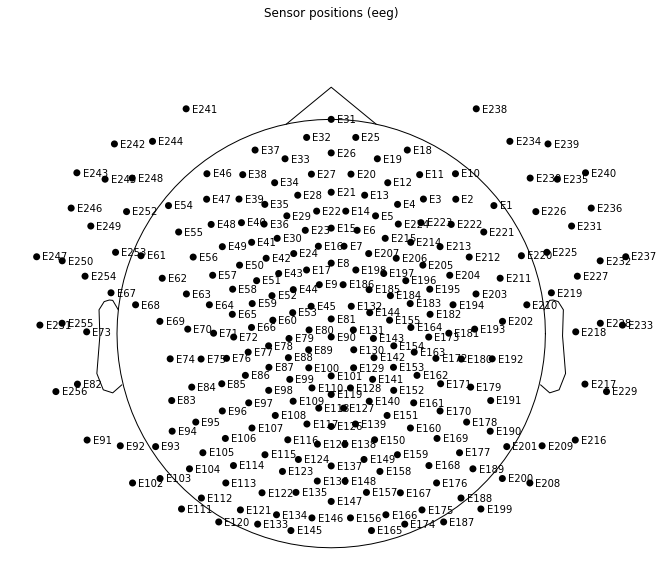

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 399 samples (1.656 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


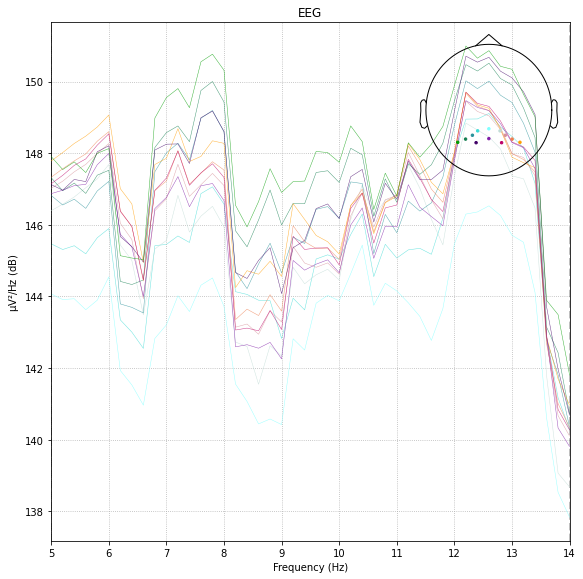

    Using multitaper spectrum estimation with 7 DPSS windows


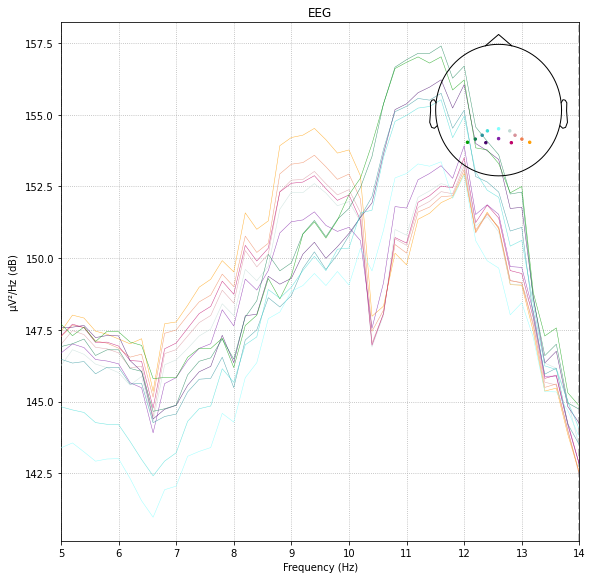

    Using multitaper spectrum estimation with 7 DPSS windows


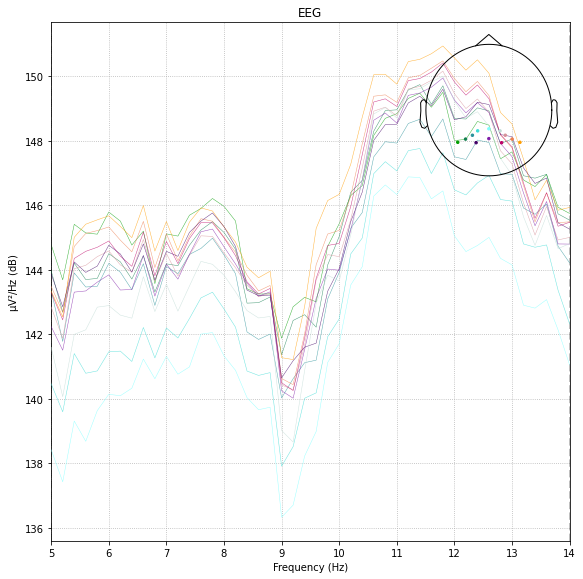

    Using multitaper spectrum estimation with 7 DPSS windows


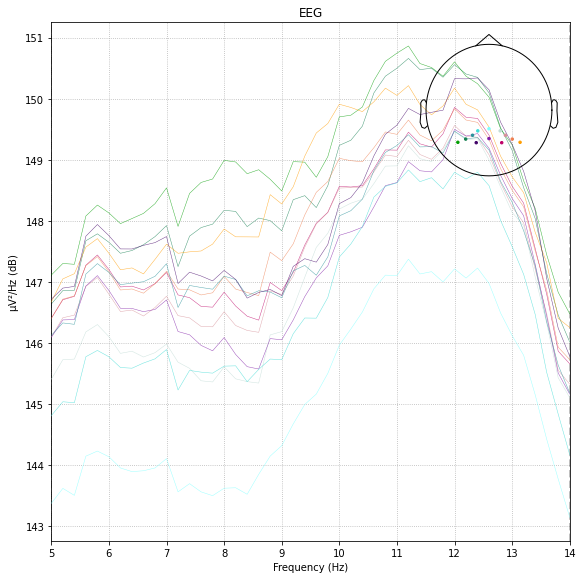

<EpochsArray  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~14.0 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>


In [22]:
# plotando o padrão EGI 256
print('EGI 256')
montage.plot()

# Filtrando apenas dados dos eletrodos O1, Oz e O2
filtered_epoch = epoch_array.copy().pick_channels(['E116', 'E126', 'E150','E106','E107','E108','E109','E119','E140','E151','E160','E169'])

filtered_epoch.filter(l_freq = 5.0, h_freq = 14.0)


matplotlib.rcParams['figure.figsize'] = [9., 9.]

# escolhendo (filtrando) somente o evento '1'
e = '5'
# selecionando alguns trials aleatórios (3, 9 e 11)
for i in (2, 3, 20):
    filtered_epoch[e][-i].plot_psd(fmin = 5., fmax = 14.)

# mostrando todos os trials do evento '1'
matplotlib.rcParams['figure.figsize'] = [9., 9.]
filtered_epoch[e].plot_psd(fmin = 5., fmax = 14.)
print(filtered_epoch)